Le dataset utilisé pour ce projet provient du site kaggle. Il contient 2126 lignes et 22 caractéristiques extraites d'examens de cardiotocographie (CTG) qui ont ensuite été classées selon 3 classes :
        - Normal
        - Suspect
        - Pathologique
L'objectif est de mettre en lumière les tendances de données et isoler les facteurs clefs pour faire des prédictions sur la santé du foetus.

In [19]:
# importation des bibliothèques que nous utiliserons pour ce TP
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, recall_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier

On va commencer par importer les données, les "nettoyer", traiter, mettre à l'échelle et ajuster pour tenir compte de déséquilibre des classes.

On commence par charger puis voir le tableau et s'assurer qu'il n'y a pas d'erreur ou de données manquantes

In [20]:
# lecture du fichier de données
data = pd.read_csv("fetal_health.csv")
# première visualisation des colonnes et des datas présentes
print (f'colonnes : \n {data.columns}')
data.head()

colonnes : 
 Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [21]:
# alignement des colonnes
data.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


In [22]:
# premet de voir si des données sont manquantes c'est-à-dire s'il y a au moins une valeur par caractéristique
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

On va regarder avec les prochains graphes les relations entre fetal_health et différentes caractéristiques

Text(0.5, 1.0, 'fréquence caridaque du foetus de base (battements par minutes)')

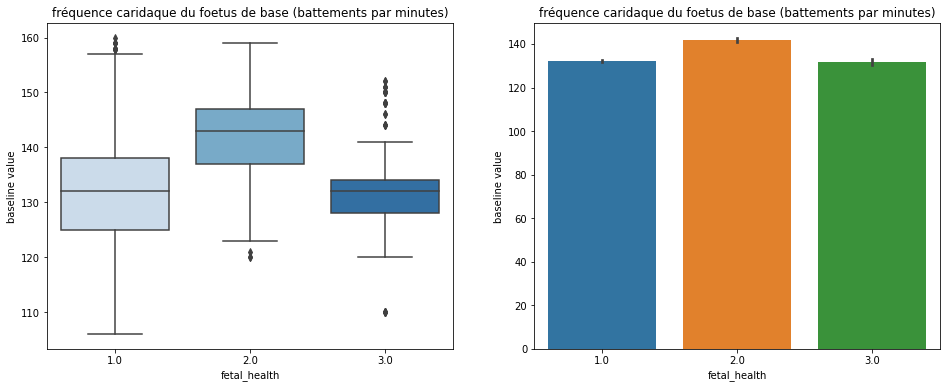

In [23]:
fetal = data['fetal_health']
plt.figure(figsize=(16, 6))
plt.subplot(121)
sns.boxplot(x = fetal, y = 'baseline value', data = data, palette = 'Blues')
plt.title('fréquence caridaque du foetus de base (battements par minutes)')
plt.subplot(122)
sns.barplot(x = fetal, y = 'baseline value', data = data)
plt.title('fréquence caridaque du foetus de base (battements par minutes)')

Text(0.5, 1.0, "nombre d'accélérations par seconde")

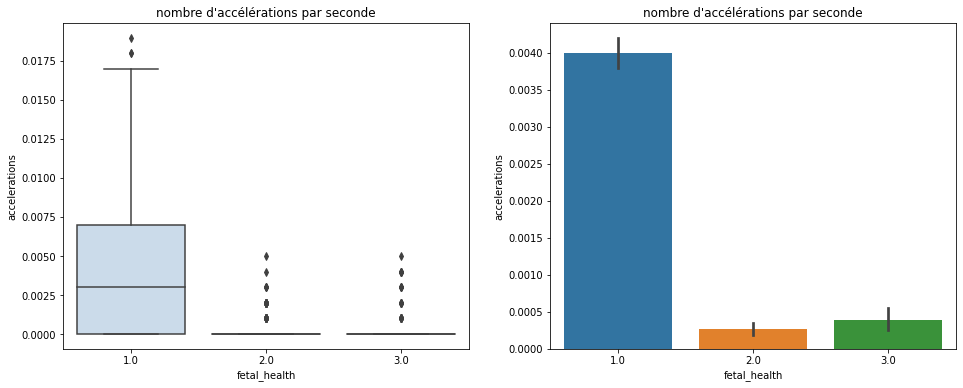

In [24]:
plt.figure(figsize=(16, 6))
plt.subplot(121)
sns.boxplot(x = fetal, y = 'accelerations', data = data, palette = 'Blues')
plt.title("nombre d'accélérations par seconde")
plt.subplot(122)
sns.barplot(x = fetal, y = 'accelerations', data = data)
plt.title("nombre d'accélérations par seconde")

Text(0.5, 1.0, 'nombre de décélérations légères par seconde')

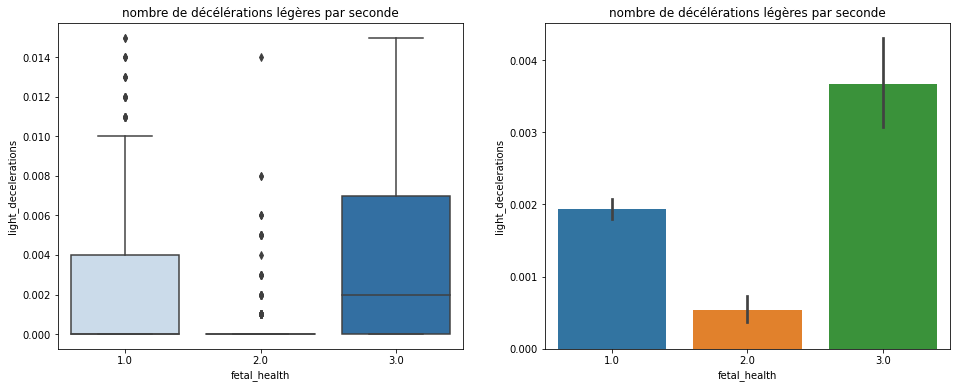

In [25]:
plt.figure(figsize=(16, 6))
plt.subplot(121)
sns.boxplot(x = fetal, y = 'light_decelerations', data = data, palette = 'Blues')
plt.title('nombre de décélérations légères par seconde')
plt.subplot(122)
sns.barplot(x = fetal, y = 'light_decelerations', data = data)
plt.title('nombre de décélérations légères par seconde')

Nous cherchons a avoir un aperçu le plus simple et le plus clair qui nous donne des indications sur les relations entre la santé du foetus et les différentes caractéristiques observées.

Sur la partie en dessous, on regarde un peu les proportions entre normal, suspect et pathologique et notammenet le nombre de cas exacte pour chaque.

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64


c:\users\hugue\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

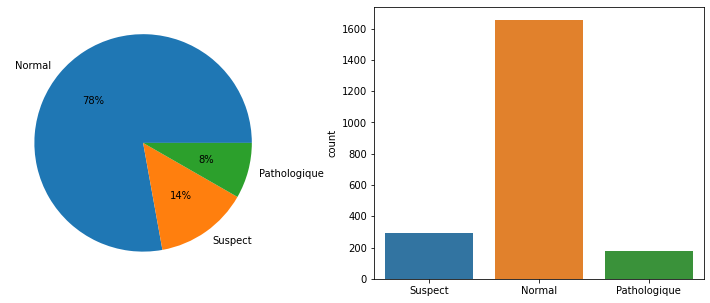

In [26]:
d1, d2, d3 = data['fetal_health'].value_counts()
plt.figure(figsize= (13, 5))
plt.subplot(121)
plt.pie([d1, d2, d3], labels = ['Normal', 'Suspect', 'Pathologique'], autopct='%1.00f%%')
print(data['fetal_health'].value_counts())
Statut = {1: 'Normal',
          2: 'Suspect',
          3: 'Pathologique'}
fetal = [Statut[i] for i in data['fetal_health']]
plt.subplot(122)
sns.countplot(fetal)

On cherche désormais une correlation entre la santé du foetus et d'autres caractéristiques.
En étudiant un peu plus précisemment le tableau de "chaleur", on identifie une forte corrélation entre fetal_health et prolongued_decelarations, on observe également une corrélation non-négligeable entre la santé du foetus et le pourcentage de temps où la variabilité à long terme est anormal.

                                                    baseline value  \
fetal_health                                              0.148151   
prolongued_decelerations                                 -0.104597   
abnormal_short_term_variability                           0.305570   
percentage_of_time_with_abnormal_long_term_vari...        0.285630   
histogram_variance                                       -0.133938   
baseline value                                            1.000000   
severe_decelerations                                     -0.053518   
fetal_movement                                           -0.033436   
histogram_min                                             0.361619   
light_decelerations                                      -0.159032   

                                                    accelerations  \
fetal_health                                            -0.364066   
prolongued_decelerations                                -0.127749   
abnormal_short_term_va

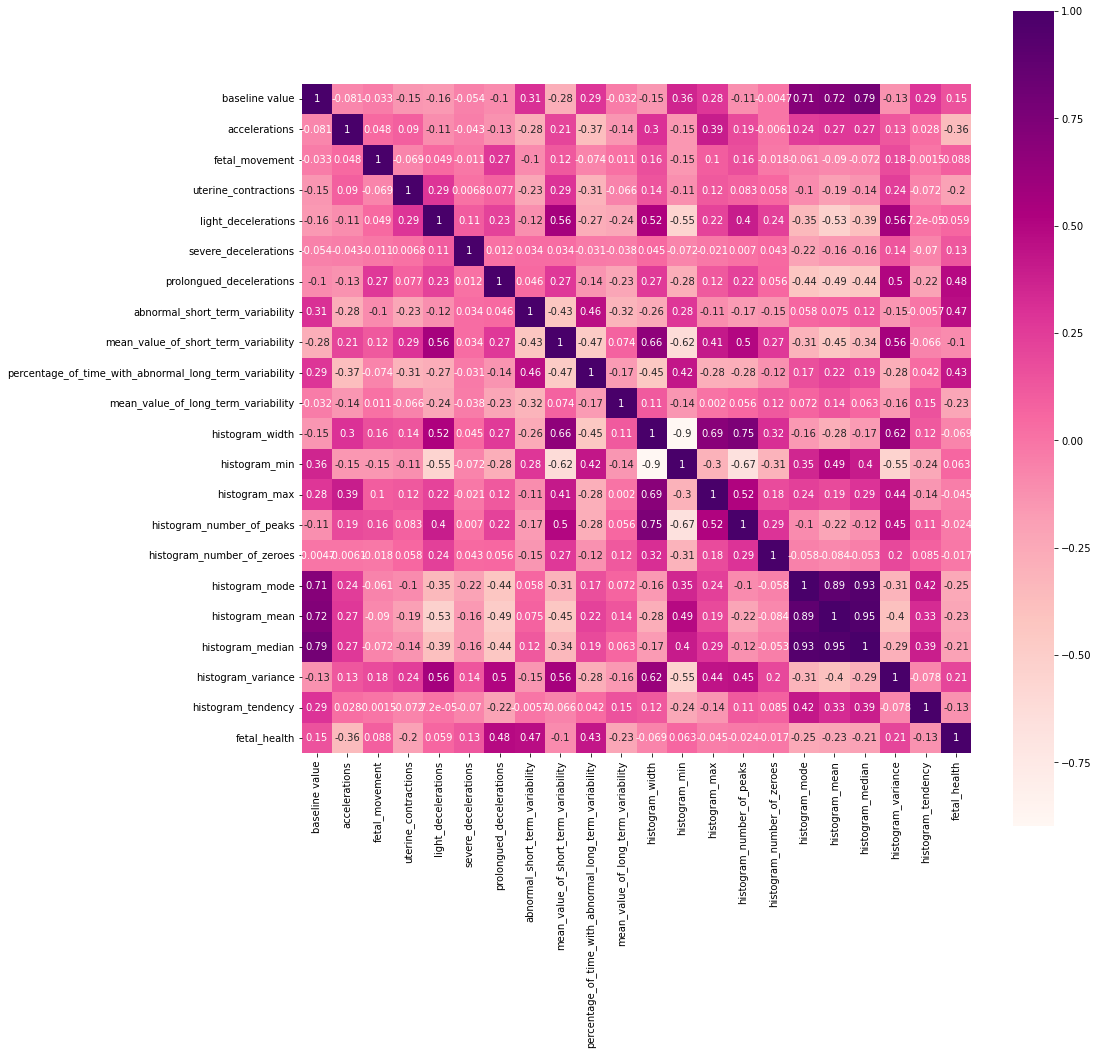

In [27]:
correlation = data.corr()
sort_correlation = correlation.sort_values(by = ['fetal_health'], ascending = False).head(10)
plt.figure(figsize = (15, 15))
sns.heatmap(data.corr(), annot = True, cmap = 'RdPu', cbar = True, square = True)
print(sort_correlation)

Nous regardons ensuite la distribution des données et les histogrammes pour chaque facteur.
Parmi la liste d'histogramme en dessous, l'acceleration est intéressant, on a notamment un maximum à 0 comme pour les mouvements foetaux
L'utilisation de la fonction value_counts() est utile pour chaque caractéristique puisque celle-ci nous permet de nous assurer qu'il y a un nombre suffisant de valeurs qui puissent être prise en compte.

array([[<AxesSubplot:title={'center':'baseline value'}>,
        <AxesSubplot:title={'center':'accelerations'}>,
        <AxesSubplot:title={'center':'fetal_movement'}>,
        <AxesSubplot:title={'center':'uterine_contractions'}>,
        <AxesSubplot:title={'center':'light_decelerations'}>],
       [<AxesSubplot:title={'center':'severe_decelerations'}>,
        <AxesSubplot:title={'center':'prolongued_decelerations'}>,
        <AxesSubplot:title={'center':'abnormal_short_term_variability'}>,
        <AxesSubplot:title={'center':'mean_value_of_short_term_variability'}>,
        <AxesSubplot:title={'center':'percentage_of_time_with_abnormal_long_term_variability'}>],
       [<AxesSubplot:title={'center':'mean_value_of_long_term_variability'}>,
        <AxesSubplot:title={'center':'histogram_width'}>,
        <AxesSubplot:title={'center':'histogram_min'}>,
        <AxesSubplot:title={'center':'histogram_max'}>,
        <AxesSubplot:title={'center':'histogram_number_of_peaks'}>],
      

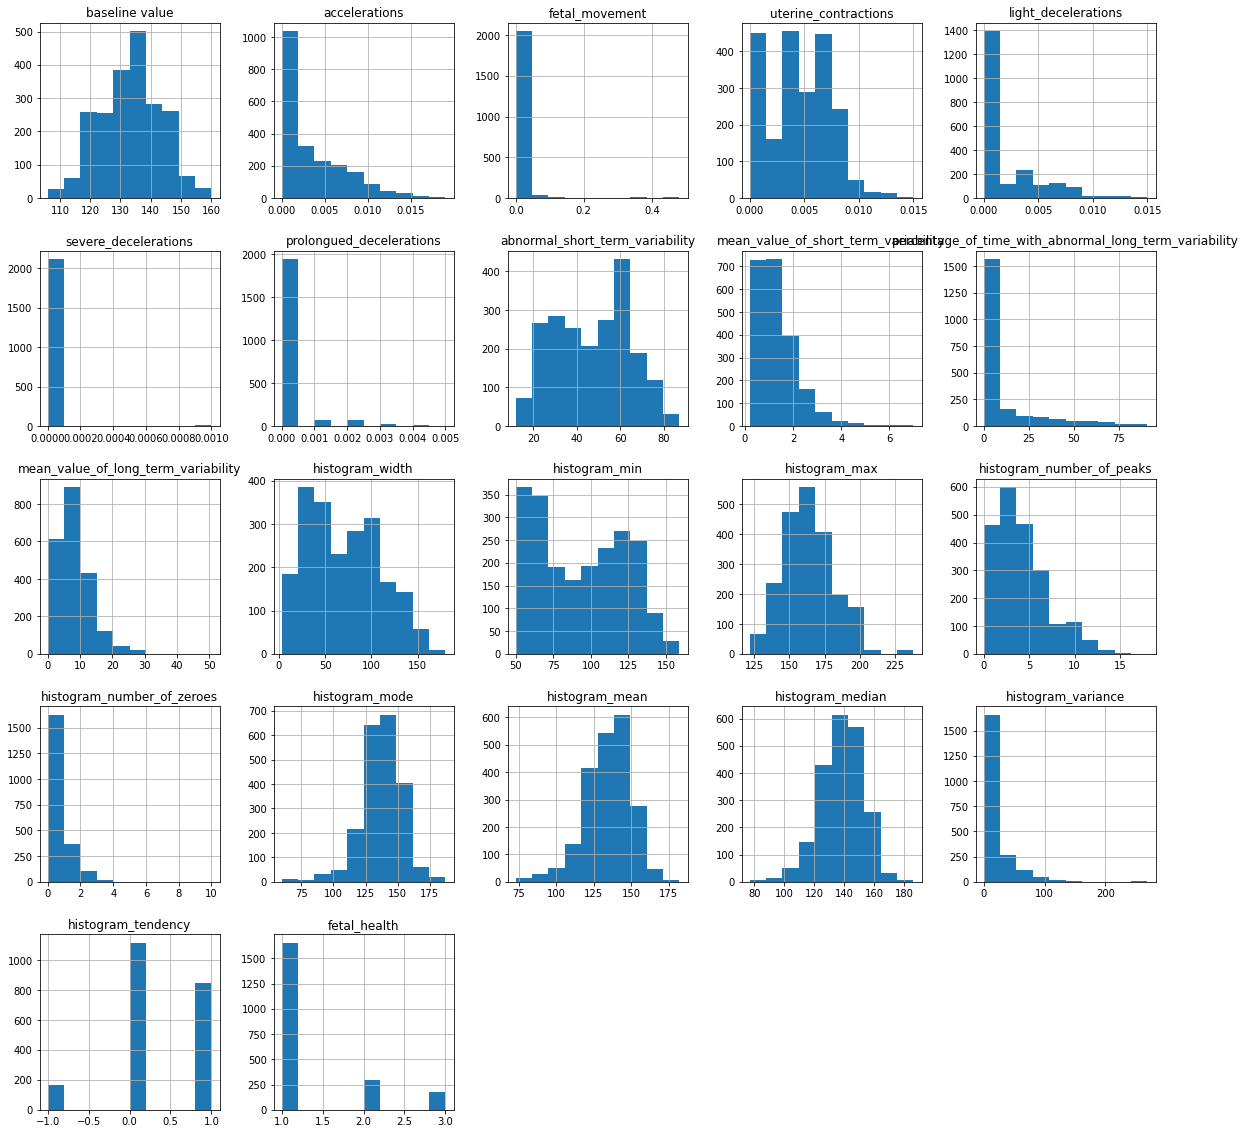

In [28]:
data.hist(figsize = (20, 20))

In [29]:
# on doit réécrire toutes les colonnes
colonnes = ['baseline value', 'accelerations', 'fetal_movement', 'uterine_contractions', 'light_deceleration', 'severe_deceleration', 'prolongued_decelerations', 'abnormal_short_term_variability', 'mean_value_of_short_term_varibility', 'percentage_of_time_with_abnormal_long_term_variability', 'mean_value_of_lonh_term_variability', 'histogram_width', 'histogram_min', 'histogram_max', 'histogram_number_of_peaks', 'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean', 'histogram_median', 'histogram_variance', 'histogram_tendency']
# on va désormais normaliser des données
standard_scaler = StandardScaler()
x = standard_scaler.fit_transform(data.drop(['fetal_health'], axis = 1))
# on passe par un DataFrame, format nécessaire pour pouvoir faire une prediction
data_nor = pd.DataFrame(x, columns = colonnes)
data_nor.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_deceleration,severe_deceleration,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_varibility,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,-1.352220,-0.822388,-0.20321,-1.482465,-0.638438,-0.057476,-0.268754,1.513190,-0.943095,1.802542,...,-0.165507,-1.068562,-2.119592,-0.701397,-0.458444,-1.065614,0.153270,-1.181642,1.870569,1.112980
1,-0.132526,0.730133,-0.20321,0.554627,0.375243,-0.057476,-0.268754,-1.744751,0.868841,-0.535361,...,1.529124,-0.865539,1.893794,0.655137,0.958201,0.216638,0.089126,0.132038,-0.234998,-0.524526
2,-0.030884,-0.046128,-0.20321,1.233657,0.375243,-0.057476,-0.268754,-1.802928,0.868841,-0.535361,...,1.529124,-0.865539,1.893794,0.316003,0.958201,0.216638,0.024982,-0.006244,-0.200481,-0.524526
3,0.070757,-0.046128,-0.20321,1.233657,0.375243,-0.057476,-0.268754,-1.802928,1.208579,-0.535361,...,1.195333,-1.373097,0.333033,2.350804,-0.458444,-0.027600,-0.039162,-0.075385,-0.200481,1.112980
4,-0.132526,0.988886,-0.20321,1.233657,-0.638438,-0.057476,-0.268754,-1.802928,1.208579,-0.535361,...,1.195333,-1.373097,0.333033,1.672537,-0.458444,-0.027600,0.089126,-0.006244,-0.269516,1.112980


On va pouvoir ensuite diviser les données entre celle de training et celle de test pour entraîner le modèle et tester avec les données de test.

In [30]:
# on donne ici la valeur à chercher dans notre classification
target = data['fetal_health']
# ici on sépare les valeurs d'entrainement et les valeurs à tester par la suite
X_train, X_test, Y_train, Y_test = train_test_split(data_nor, target, test_size = 0.4, random_state = 42, stratify = target)
logistic_regression = LogisticRegression()
logistic_regression_mod = logistic_regression.fit(X_train, Y_train)
Y_pred = logistic_regression_mod.predict(X_test)
logistic_regression_mod.score(X_test, Y_test)

0.8977673325499412

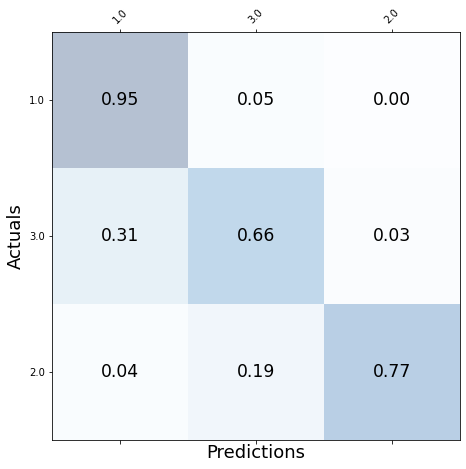

In [31]:
# on va ici créer un tableau analysant les résultats du classifier pour comparer les valeurs exactes et les prédictions obtenues
labels_array = Y_train.unique()
conf_matrix = confusion_matrix(list(Y_test), Y_pred)
conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=format(conf_matrix[i, j], ".2f"), va='center', ha='center', size='xx-large',)

tick_marks = np.arange(len(labels_array))
plt.xticks(tick_marks, labels_array, rotation=45)
plt.yticks(tick_marks, labels_array)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.show()

In [32]:
clf = svm.SVC(C = 5)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
clf.score(X_test, Y_test)

0.9071680376028202

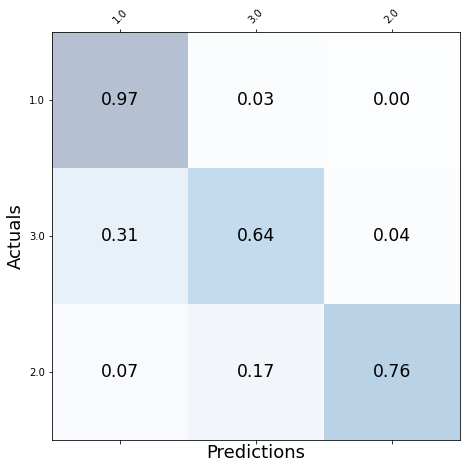

In [33]:
conf_matrix = confusion_matrix(list(Y_test), Y_pred)
conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=format(conf_matrix[i, j], ".2f"), va='center', ha='center', size='xx-large',)

tick_marks = np.arange(len(labels_array))
plt.xticks(tick_marks, labels_array, rotation=45)
plt.yticks(tick_marks, labels_array)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.show()

In [34]:
tree = DecisionTreeClassifier(criterion = 'gini', max_depth = 5, class_weight = 'balanced', random_state = 42)
tree.fit(X_train, Y_train)
predict = tree.predict(X_test)
print(classification_report(Y_test, predict))
print('Résultat classification : ', recall_score(Y_test, predict, average = 'micro'))

              precision    recall  f1-score   support

         1.0       0.97      0.83      0.89       663
         2.0       0.49      0.85      0.62       118
         3.0       0.89      0.91      0.90        70

    accuracy                           0.84       851
   macro avg       0.78      0.87      0.80       851
weighted avg       0.89      0.84      0.86       851

Résultat classification :  0.8425381903642774


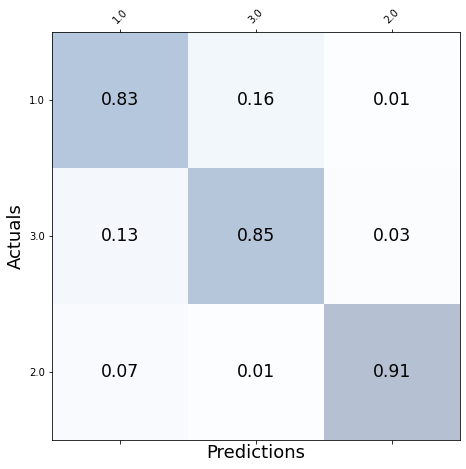

In [35]:
conf_matrix = confusion_matrix(list(Y_test), predict)
conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=format(conf_matrix[i, j], ".2f"), va='center', ha='center', size='xx-large',)

tick_marks = np.arange(len(labels_array))
plt.xticks(tick_marks, labels_array, rotation=45)
plt.yticks(tick_marks, labels_array)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.show()